In [34]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import hist
from hist import Hist
import mplhep as hep
import math
import scipy
from scipy.signal import peak_widths

genkt = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_z_xsec_qq_genkt.root")
kt = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_z_xsec_qq_kt.root")
valencia = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_z_xsec_qq_valencia.root")

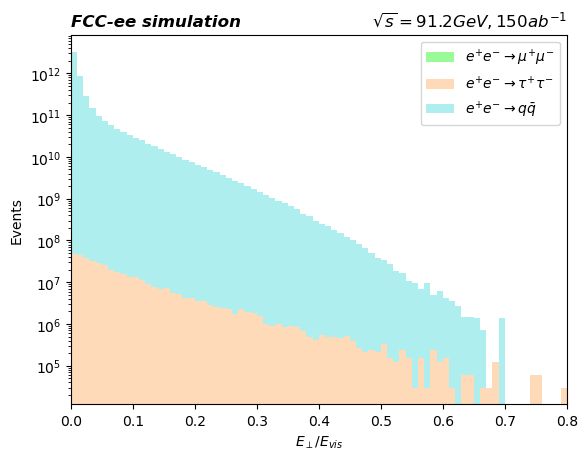

In [35]:
genkt_et = genkt['wzp6_ee_qq_ecm91p2/et;1'].to_hist()
genkt_tau_et = genkt['wzp6_ee_tautau_ecm91p2/et;1'].to_hist()
genkt_mu_et = genkt['wzp6_ee_mumu_ecm91p2/et;1'].to_hist()

hep.histplot([genkt_mu_et,genkt_tau_et,genkt_et], stack = True, 
             label = [r"$e^{+} e^{-} \rightarrow \mu^{+} \mu^{-}$",
                      r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$",r"$e^{+} e^{-} \rightarrow q \bar{q}$"], 
             color = ["palegreen", "peachpuff", "paleturquoise"], 
             histtype = "fill")
plt.legend()
plt.xlim(0,0.8)
plt.xlabel(r"$E_{\perp}$/$E_{vis}$")
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91.2 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
plt.yscale("log")
#plt.savefig("images/hardrons_et.png")

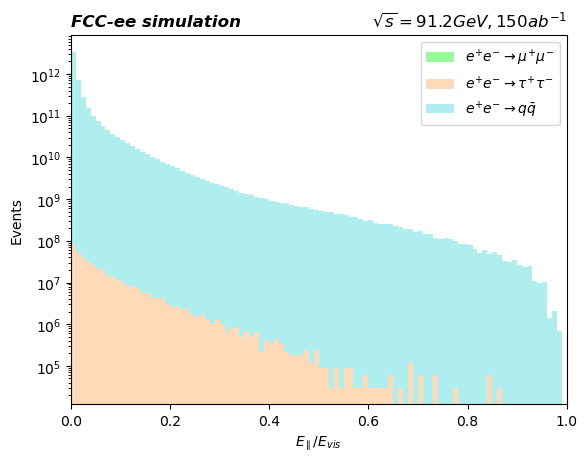

In [36]:
genkt_ep = genkt['wzp6_ee_qq_ecm91p2/ep;1'].to_hist()
genkt_tau_ep = genkt['wzp6_ee_tautau_ecm91p2/ep;1'].to_hist()
genkt_mu_ep = genkt['wzp6_ee_mumu_ecm91p2/ep;1'].to_hist()

hep.histplot([genkt_mu_ep,genkt_tau_ep,genkt_ep], stack = True, 
             label = [r"$e^{+} e^{-} \rightarrow \mu^{+} \mu^{-}$",
                      r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$",r"$e^{+} e^{-} \rightarrow q \bar{q}$"], 
             color = ["palegreen", "peachpuff", "paleturquoise"], 
             histtype = "fill")
plt.legend()
plt.xlim(0,1)
plt.xlabel(r"$E_{\parallel}$/$E_{vis}$")
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91.2 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
plt.yscale("log")
#plt.savefig("images/hardrons_ep.png")

Text(0.0, 1.0, 'FCC-ee simulation')

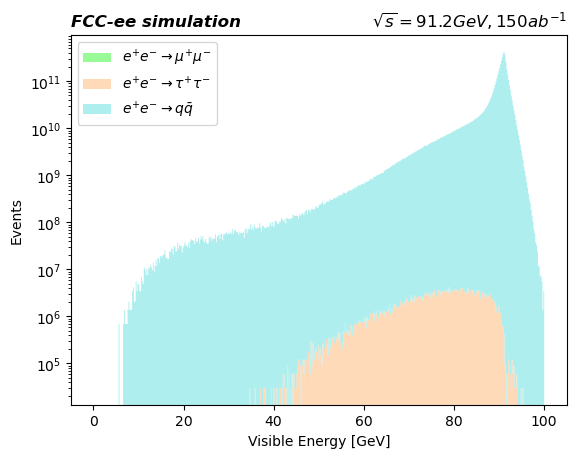

In [39]:
genkt_e = genkt['wzp6_ee_qq_ecm91p2/sum_e;1'].to_hist()
genkt_tau_e = genkt['wzp6_ee_tautau_ecm91p2/sum_e;1'].to_hist()
genkt_mu_e = genkt['wzp6_ee_mumu_ecm91p2/sum_e;1'].to_hist()

hep.histplot([ genkt_mu_e, genkt_tau_e, genkt_e],stack = True, 
             label = [r"$e^{+} e^{-} \rightarrow \mu^{+} \mu^{-}$",
                      r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$",r"$e^{+} e^{-} \rightarrow q \bar{q}$"], 
             color = ["palegreen", "peachpuff", "paleturquoise"], 
             histtype = "fill")
plt.legend(loc = "upper left")
plt.yscale("log")
plt.xlabel("Visible Energy [GeV]")
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91.2 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
#plt.savefig("images/hardrons_tau_e.png")

(0.0, 125.0)

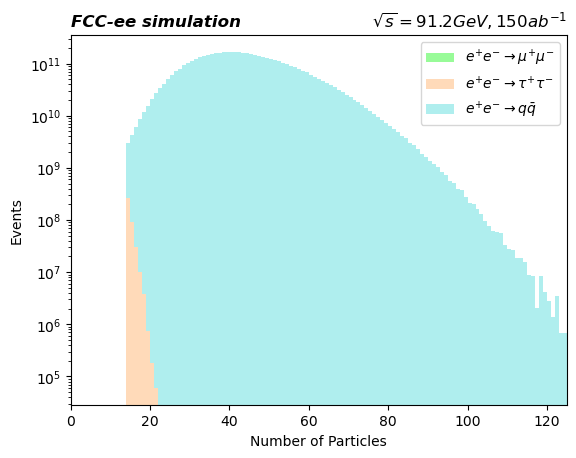

In [40]:
genkt_tau_no = genkt['wzp6_ee_tautau_ecm91p2/RP_no;1'].to_hist()
genkt_mu_no = genkt['wzp6_ee_mumu_ecm91p2/RP_no;1'].to_hist()
genkt_no = genkt['wzp6_ee_qq_ecm91p2/RP_no;1'].to_hist()
hep.histplot([genkt_mu_no, genkt_tau_no, genkt_no],stack = True, 
             label = [r"$e^{+} e^{-} \rightarrow \mu^{+} \mu^{-}$",
                      r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$",r"$e^{+} e^{-} \rightarrow q \bar{q}$"], 
             color = ["palegreen", "peachpuff", "paleturquoise"], 
             histtype = "fill")
plt.legend(loc = "upper right")
plt.yscale("log")
plt.xlabel("Number of Particles")
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91.2 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
plt.xlim(0,125)
#plt.savefig("images/hardrons_tau_no.png")

Text(0.0, 1.0, 'FCC-ee simulation')

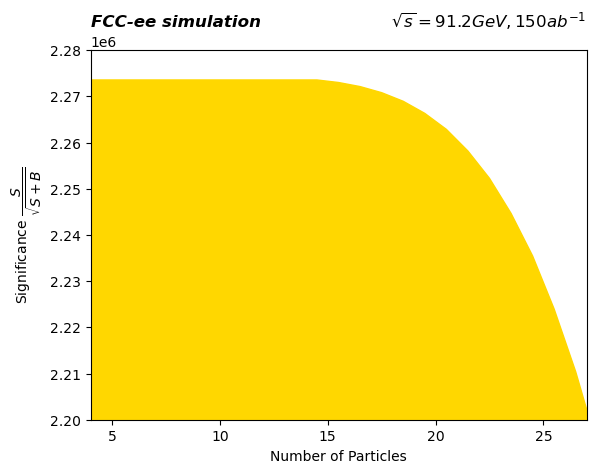

In [41]:
genkt_no_x = genkt_no.axes[0].centers
genkt_no_y = genkt_no.values()

genkt_tau_no_x = genkt_tau_no.axes[0].centers
genkt_tau_no_y = genkt_tau_no.values()

genkt_muu_no_x = genkt_mu_no.axes[0].centers
genkt_muu_no_y = genkt_mu_no.values()

genkt_no_ynew = []

for i in genkt_no_x:
    s = genkt_no[i*1.0j:].sum()
    b = genkt_tau_no[i*1.0j:].sum()+genkt_mu_no[i*1.0j:].sum()
    if s.value+b.value < 0.0000000001:
        genkt_no_ynew.append(0)
    else:
        ratio = s.value/math.sqrt(s.value+b.value)
        genkt_no_ynew.append(ratio)

plt.stackplot(genkt_no_x,genkt_no_ynew, color = "gold")
plt.ylim(2.2e6,2.28e6)
plt.xlim(4,27)
plt.xlabel("Number of Particles")
plt.ylabel(r"Significance $\dfrac{S}{\sqrt{S+B}}$")
plt.title(r"$\sqrt{s} = 91.2 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
#plt.savefig("images/hardrons_tau_cut_no.png")

In [42]:
genkt_no_sig = max(genkt_no_ynew)
genkt_no_index = np.argmax(genkt_no_ynew)
genkt_no_cut = genkt_no_x[genkt_no_index]

print(genkt_no_sig)
print(genkt_no_cut)

2273541.4158034776
0.5
